150 4


Text(0, 0.5, 'petal width (cm)')

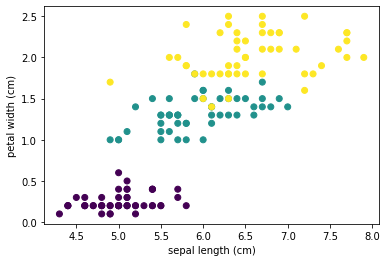

In [13]:
from sklearn.datasets  import load_iris
import numpy as np
from matplotlib import pyplot as plt


##load data
iris = load_iris()

n_samples, n_features = iris.data.shape
print(n_samples, n_features)


f1 = 0
f2 = 3

plt.scatter(iris.data[:,f1], iris.data[:,f2], c=iris.target)
plt.xlabel(iris.feature_names[f1])
plt.ylabel(iris.feature_names[f2])

In [18]:
# make training data

feature1 = iris.data[:, f1]
feature2 = iris.data[:, f2]
print(feature1)
print(feature2)

feature1 = feature1.reshape(n_samples, 1)
feature2 = feature2.reshape(n_samples, 1)
# print(feature1)
# print(feature2)
training_data = np.concatenate( [feature1, feature2], axis = 1 )
print(training_data)

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]
[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
 0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
 0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
 1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
 1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
 1.2 1.4 1.2 1.  1.3 1.2 1

sum of squared error= 32.73746031746032
[[5.89259259 1.46296296]
 [5.00555556 0.3037037 ]
 [6.85714286 2.01190476]]


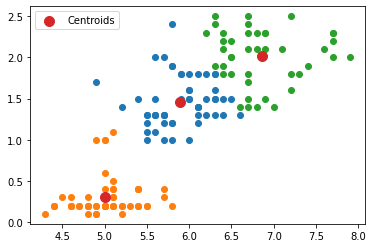

In [33]:
#training KMeans
from sklearn.cluster import KMeans

KMeans_model = KMeans(n_clusters = 3 , random_state = 1)

KMeans_model.fit(training_data)#learn the clusters

labels = KMeans_model.predict(training_data)

print("sum of squared error=", KMeans_model.inertia_)

print(KMeans_model.cluster_centers_)


plt.scatter(iris.data[labels==0,f1], iris.data[labels==0,f2])
plt.scatter(iris.data[labels==1,f1], iris.data[labels==1,f2])
plt.scatter(iris.data[labels==2,f1], iris.data[labels==2,f2])

plt.scatter(KMeans_model.cluster_centers_[:, 0],KMeans_model.cluster_centers_[:, 1],s=100, label = "Centroids")

plt.legend()

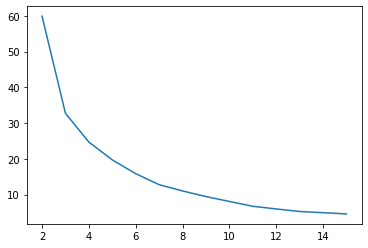

In [36]:
#run kmeans  for different K

wcssq = []

for k in range(2, 16):
    KMeans_model = KMeans(n_clusters = k , random_state = 1)
    KMeans_model.fit(training_data)#learn the clusters
    wcssq.append(KMeans_model.inertia_)

#plot the errors for all the kmeans 
plt.plot( range(2, 16), wcssq )

(30, 80) 
 (30, 80)
(2400, 1) (2400, 1)
(2400, 2)
 [1 1 1 ... 2 2 2]


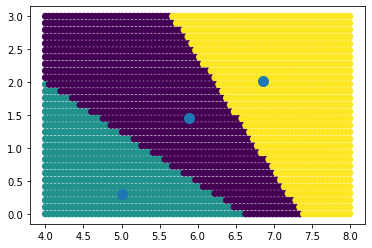

In [49]:
####### generating all points 
x = np.linspace(4,8,80)
# print(x)
y = np.linspace(0,3,30)
# print(y)

xx, yy = np.meshgrid(x,y)
# print(xx,"\n" , yy)
# plt.scatter(xx,yy)

print(xx.shape,"\n" , yy.shape)

l, w = xx.shape
n_test = l*w
xx = xx.reshape(n_test, 1)
yy = yy.reshape(n_test, 1)
print(xx.shape, yy.shape)

test_data = np.concatenate([xx, yy], axis=1)
print(test_data.shape)


KMeans_model = KMeans(n_clusters = 3 , random_state = 1)
KMeans_model.fit(training_data)#learn the clusters
labels = KMeans_model.predict(test_data)
print("", labels)

plt.scatter(xx, yy, c = labels)
plt.scatter(KMeans_model.cluster_centers_[:, 0],KMeans_model.cluster_centers_[:, 1],s=100)